<a href="https://colab.research.google.com/github/PrajwalUnaik/DataAnalytics_Practice/blob/main/Day6_Embedded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)

# Extract texture-related features
texture_features = [name for name in data.feature_names if "texture" in name]

# Display the values of the texture features
texture_values = X[texture_features]

# Show the first few rows of the texture features
print("Texture Features Values (First 5 Rows):")
print(texture_values.head())


Texture Features Values (First 5 Rows):
   mean texture  texture error  worst texture
0         10.38         0.9053          17.33
1         17.77         0.7339          23.41
2         21.25         0.7869          25.53
3         20.38         1.1560          26.50
4         14.34         0.7813          16.67


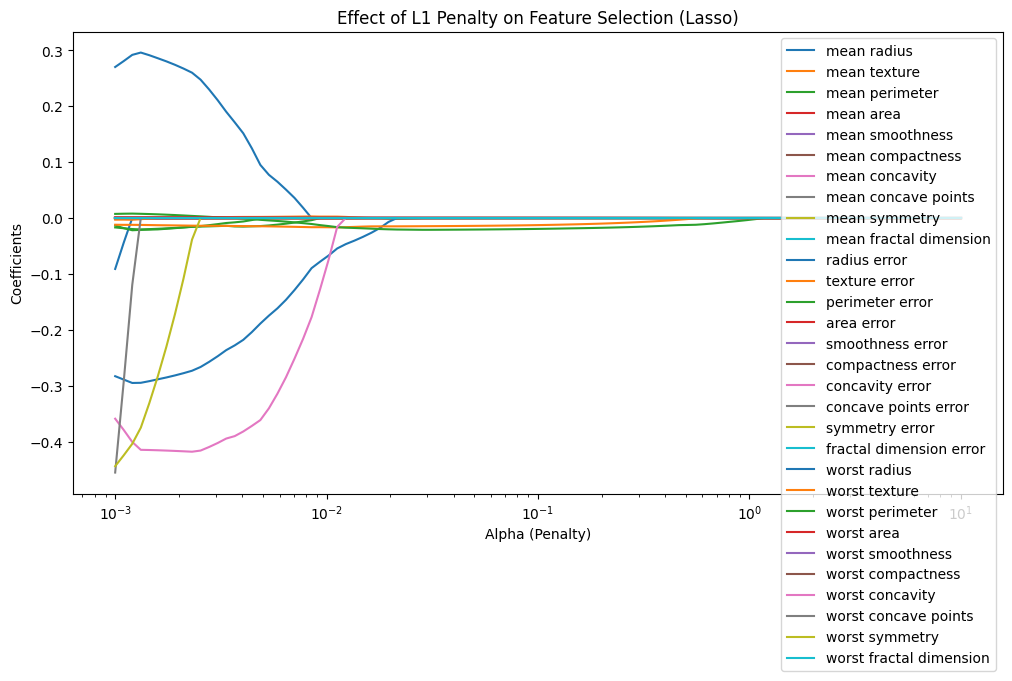

Selected Features with Lasso Regularization (Alpha = 0.1):
['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']


In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # Using class labels as numeric targets




# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regularization
alphas = np.logspace(-3, 1, 100)  # Range of penalty values, generates a sequence of 100 values logarithmically spaced between 10^-3, and 10^1
lasso_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

# Plot the effect of penalty on Lasso coefficients
plt.figure(figsize=(12, 6))
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Penalty)')
plt.ylabel('Coefficients')
plt.title('Effect of L1 Penalty on Feature Selection (Lasso)')
plt.legend(X.columns, loc='best')
plt.show()

# Final feature selection with a chosen alpha
chosen_alpha = 0.1  # Adjust alpha based on analysis
lasso = Lasso(alpha=chosen_alpha, max_iter=10000)
lasso.fit(X_train, y_train)

selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features with Lasso Regularization (Alpha = 0.1):")
print(selected_features.tolist())


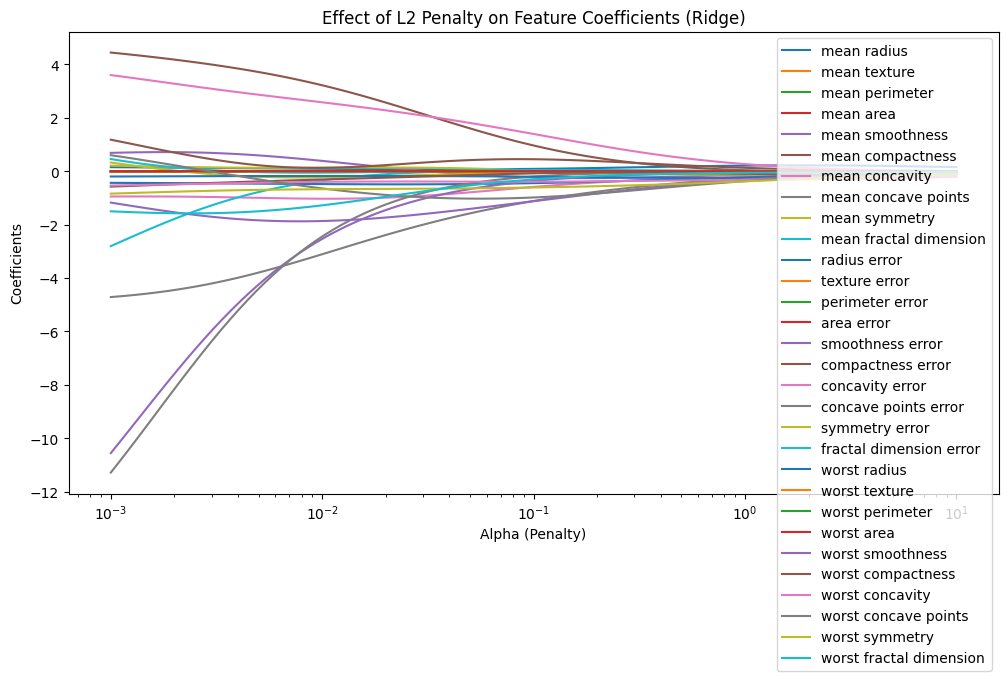

Ridge Coefficients with Regularization (Alpha = 0.1):
mean radius: 0.0891
mean texture: -0.0083
mean perimeter: 0.0005
mean area: -0.0008
mean smoothness: -0.2333
mean compactness: 0.9652
mean concavity: -0.5869
mean concave points: -1.1160
mean symmetry: 0.0273
mean fractal dimension: 0.0163
radius error: -0.4453
texture error: -0.0119
perimeter error: -0.0054
area error: 0.0020
smoothness error: -0.3623
compactness error: 0.4501
concavity error: 1.3964
concave points error: -0.1995
symmetry error: -0.0650
fractal dimension error: 0.0486
worst radius: -0.2038
worst texture: -0.0057
worst perimeter: 0.0065
worst area: 0.0010
worst smoothness: -1.1217
worst compactness: -0.0790
worst concavity: -0.3914
worst concave points: -0.9823
worst symmetry: -0.6077
worst fractal dimension: -0.3062


In [25]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regularization
alphas = np.logspace(-3, 1, 100)  # Range of penalty values
ridge_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

# Plot the effect of penalty on Ridge coefficients
plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Penalty)')
plt.ylabel('Coefficients')
plt.title('Effect of L2 Penalty on Feature Coefficients (Ridge)')
plt.legend(X.columns, loc='best')
plt.show()

# Final feature analysis with a chosen alpha
chosen_alpha = 0.1 # Adjust alpha based on analysis
ridge = Ridge(alpha=chosen_alpha, max_iter=10000)
ridge.fit(X_train, y_train)

print(f"Ridge Coefficients with Regularization (Alpha = {chosen_alpha}):")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"{feature}: {coef:.4f}")


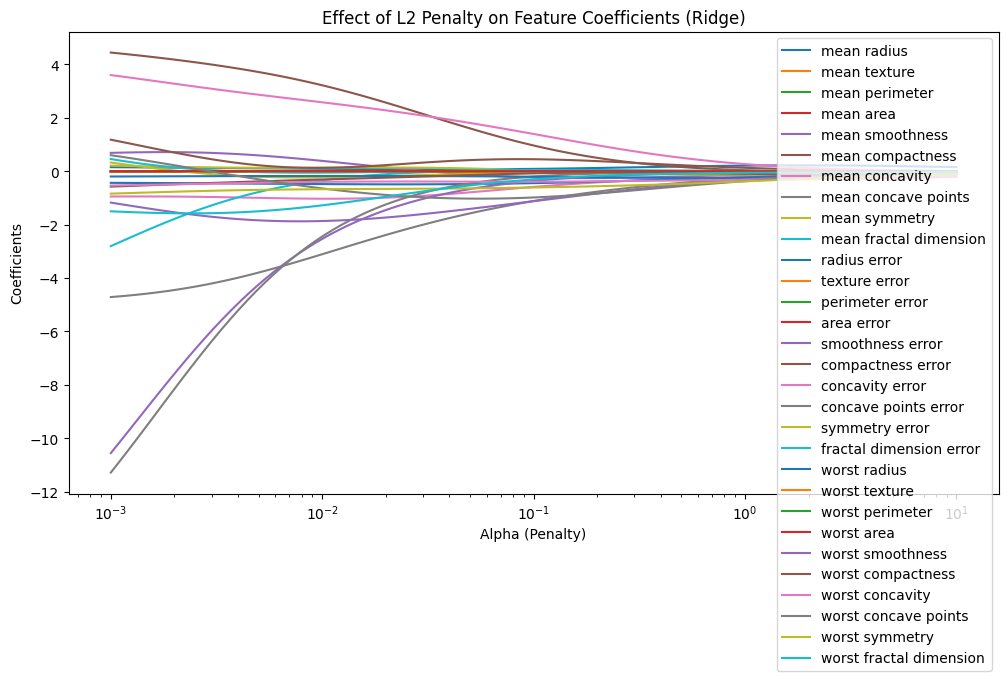

Selected Features with Ridge Regularization (Alpha = 0.1, Threshold = 0.13964280027857798):
['mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'worst radius', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Feature Coefficients:
mean radius: 0.0891 (Removed)
mean texture: -0.0083 (Removed)
mean perimeter: 0.0005 (Removed)
mean area: -0.0008 (Removed)
mean smoothness: -0.2333 
mean compactness: 0.9652 
mean concavity: -0.5869 
mean concave points: -1.1160 
mean symmetry: 0.0273 (Removed)
mean fractal dimension: 0.0163 (Removed)
radius error: -0.4453 
texture error: -0.0119 (Removed)
perimeter error: -0.0054 (Removed)
area error: 0.0020 (Removed)
smoothness error: -0.3623 
compactness error: 0.4501 
concavity error: 1.3964 
concave points error: -0.1995 
symmetry error: -0.0650 (Removed)
fractal dime

In [26]:


# Ridge Regularization
alphas = np.logspace(-3, 1, 100)  # Range of penalty values
ridge_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

# Plot the effect of penalty on Ridge coefficients
plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Penalty)')
plt.ylabel('Coefficients')
plt.title('Effect of L2 Penalty on Feature Coefficients (Ridge)')
plt.legend(X.columns, loc='best')
plt.show()

# Final feature analysis with a chosen alpha
chosen_alpha = 0.1  # Adjust alpha based on analysis
ridge = Ridge(alpha=chosen_alpha, max_iter=10000)
ridge.fit(X_train, y_train)

# Define a threshold for removing features
coefficients = ridge.coef_
threshold = 0.1 * max(abs(coefficients))  # Adjust based on domain knowledge or analysis
selected_features = X.columns[np.abs(coefficients) > threshold]

print(f"Selected Features with Ridge Regularization (Alpha = {chosen_alpha}, Threshold = {threshold}):")
print(selected_features.tolist())

print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f} {'(Removed)' if abs(coef) <= threshold else ''}")


Selected Features with Decision Tree (Threshold = 0.05):
['mean concave points', 'worst radius', 'worst perimeter', 'worst concave points']

Feature Importances:
mean radius: 0.0000 (Removed)
mean texture: 0.0314 (Removed)
mean perimeter: 0.0000 (Removed)
mean area: 0.0000 (Removed)
mean smoothness: 0.0000 (Removed)
mean compactness: 0.0000 (Removed)
mean concavity: 0.0000 (Removed)
mean concave points: 0.7037 
mean symmetry: 0.0000 (Removed)
mean fractal dimension: 0.0000 (Removed)
radius error: 0.0000 (Removed)
texture error: 0.0064 (Removed)
perimeter error: 0.0000 (Removed)
area error: 0.0122 (Removed)
smoothness error: 0.0013 (Removed)
compactness error: 0.0000 (Removed)
concavity error: 0.0000 (Removed)
concave points error: 0.0162 (Removed)
symmetry error: 0.0000 (Removed)
fractal dimension error: 0.0189 (Removed)
worst radius: 0.0532 
worst texture: 0.0282 (Removed)
worst perimeter: 0.0524 
worst area: 0.0000 (Removed)
worst smoothness: 0.0094 (Removed)
worst compactness: 0.000

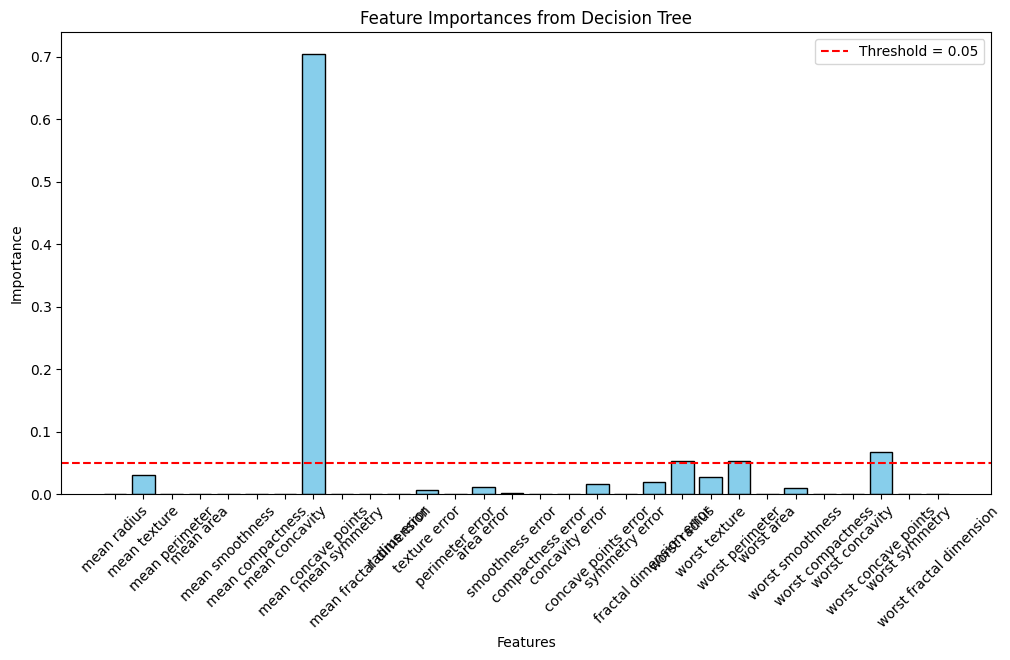

In [27]:


# Decision Tree Regressor for Embedded Feature Selection
# Train a Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42, max_depth=5)  # max_depth can be adjusted
tree.fit(X_train, y_train)

# Extract feature importances
feature_importances = tree.feature_importances_

# Define a threshold for importance
threshold = 0.05  # Adjust based on analysis
selected_features_tree = X.columns[feature_importances > threshold]

# Print Selected Features and their Importances
print(f"Selected Features with Decision Tree (Threshold = {threshold}):")
print(selected_features_tree.tolist())

print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f} {'(Removed)' if importance <= threshold else ''}")

# Plot Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, feature_importances, color='skyblue', edgecolor='black')
plt.axhline(y=threshold, color='r', linestyle='--', label=f"Threshold = {threshold}")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Original Dataset (First 5 Rows):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture

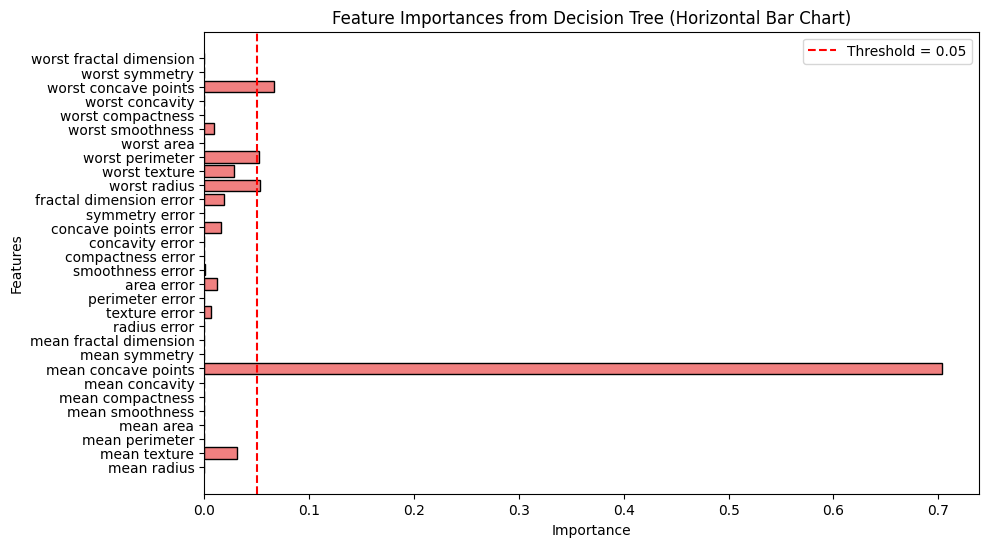

In [28]:


# Display the original dataset
print("Original Dataset (First 5 Rows):")
print(X.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor for Embedded Feature Selection
# Train a Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42, max_depth=5)  # max_depth can be adjusted
tree.fit(X_train, y_train)

# Extract feature importances
feature_importances = tree.feature_importances_

# Define a threshold for importance
threshold = 0.05  # Adjust based on analysis
selected_features_tree = X.columns[feature_importances > threshold]

# Print Selected Features and their Importances
print(f"Selected Features with Decision Tree (Threshold = {threshold}):")
print(selected_features_tree.tolist())

print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f} {'(Removed)' if importance <= threshold else ''}")

# Plot Feature Importances - Horizontal Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='lightcoral', edgecolor='black')
plt.axvline(x=threshold, color='r', linestyle='--', label=f"Threshold = {threshold}")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Decision Tree (Horizontal Bar Chart)')
plt.legend()
plt.show()
